In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy.random as rand
import seaborn as sns

In [152]:
provider = pd.Series(data = [35.40, 80, 380, 900, 400], index = ["Bread", "Milk", "Meat", "Fish", "Cheese"])
shop1 = provider["Bread":"Meat"] #ВКЛЮЧИТЕЛЬАЯ последний элемент
shop2 = provider[1:3] #обычный срез не включительно

"Shop1 = ", shop1, "Shop2 = ", shop2, "provider =", provider

('Shop1 = ',
 Bread     35.4
 Milk      80.0
 Meat     380.0
 dtype: float64,
 'Shop2 = ',
 Milk     80.0
 Meat    380.0
 dtype: float64,
 'provider =',
 Bread      35.4
 Milk       80.0
 Meat      380.0
 Fish      900.0
 Cheese    400.0
 dtype: float64)

In [153]:
shop = pd.DataFrame([["Mango", 375], ["Pepper", 50], [shop1, 2]], columns = ["Name_product", "Price"], index = ["Product1", "Product2", 'Product3']) #DataFrame - по сути состоит из series(отсюда следует что он может содержать в себе другие series)
price = shop["Price"]
product1 = shop[0:1]
mango_price = shop["Price"]["Product1"] #обращение к элементам dataframe, !!!если хотим по индексам есть метод iloc!!!
shop.columns = ["Name_product", "New_price"]
shop,"Shop1 =", shop["Name_product"], "Shop2 =" ,shop["New_price"], "New_price = ",price, "Product1=", product1, "Mango_price=", mango_price

(                                               Name_product  New_price
 Product1                                              Mango        375
 Product2                                             Pepper         50
 Product3  Bread     35.4
 Milk      80.0
 Meat     380.0
 d...          2,
 'Shop1 =',
 Product1                                                Mango
 Product2                                               Pepper
 Product3    Bread     35.4
 Milk      80.0
 Meat     380.0
 d...
 Name: Name_product, dtype: object,
 'Shop2 =',
 Product1    375
 Product2     50
 Product3      2
 Name: New_price, dtype: int64,
 'New_price = ',
 Product1    375
 Product2     50
 Product3      2
 Name: Price, dtype: int64,
 'Product1=',
          Name_product  Price
 Product1        Mango    375,
 'Mango_price=',
 np.int64(375))

In [154]:
data = pd.DataFrame([["School", 600], ["House", 4], ["Mall", 2000], ["residential complex", 1200]], 
                    columns = ["Build", "count_people"], 
                    index = ["Build1", "Build2", "Build3", "Build4"])
data, data.iloc[3,1], data.iloc[2, -1] #обращение по индексам


(                      Build  count_people
 Build1               School           600
 Build2                House             4
 Build3                 Mall          2000
 Build4  residential complex          1200,
 np.int64(1200),
 np.int64(2000))

In [155]:
#random value
rand.seed(123)
ser = pd.Series(data = (-4 + rand.random(10)*12), index = [0,1,2,3,4,5,6,7,8,9])#случайные числа от 4 до 6 не включительно
ind = ser > 0
r = ser[ind]
ser, r, ind

(0    4.357630
 1   -0.566328
 2   -1.277783
 3    2.615777
 4    4.633628
 5    1.077278
 6    7.769170
 7    4.217957
 8    1.771183
 9    0.705410
 dtype: float64,
 0    4.357630
 3    2.615777
 4    4.633628
 5    1.077278
 6    7.769170
 7    4.217957
 8    1.771183
 9    0.705410
 dtype: float64,
 0     True
 1    False
 2    False
 3     True
 4     True
 5     True
 6     True
 7     True
 8     True
 9     True
 dtype: bool)

In [156]:
#топ 500 лучших компаний
url =  "https://raw.githubusercontent.com/datasets/s-and-p-500-companies-financials/main/data/constituents-financials.csv"

data = pd.read_csv(url, sep = ',')
size = data.shape
name_columns = data.columns #название столбцов
name_index = data.index
data.head(10)#выводит первые 10 элементов

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M,Industrial Conglomerates,152.20,21.286713,0.0199,7.15,75.652176,155.00,8.329418e+10,8.117000e+09,2.552062,17.855467,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A. O. Smith,Building Products,67.30,18.539946,0.0196,3.63,66.760000,92.45,9.758165e+09,8.091000e+08,2.506078,5.091157,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care Equipment,127.93,16.744764,0.0202,7.64,99.710000,129.85,2.218895e+11,1.082500e+10,5.383446,5.575749,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie,Biotechnology,183.90,64.300700,0.0373,2.86,153.580000,207.32,3.249770e+11,2.563000e+10,5.851963,53.882210,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture,IT Consulting & Other Services,384.95,32.294464,0.0170,11.92,278.690000,387.51,2.407785e+11,1.106591e+10,3.710195,8.508687,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ADBE,Adobe Inc.,Application Software,437.45,35.421050,NaN,12.35,403.750000,638.25,1.904220e+11,8.134000e+09,9.090657,13.383815,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AMD,Advanced Micro Devices,Semiconductors,115.95,105.409090,NaN,1.10,112.800000,227.30,1.928863e+11,4.479000e+09,7.939341,3.302384,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,AES,AES Corporation,Independent Power Producers & Energy Traders,11.00,7.638888,0.0615,1.44,10.810000,22.21,7.821297e+09,3.334000e+09,0.636706,2.377350,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AFL,Aflac,Life & Health Insurance,107.38,15.955423,0.0214,6.73,75.440000,115.50,5.965260e+10,4.779250e+09,3.447728,2.407569,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,A,Agilent Technologies,Life Sciences Tools & Services,151.52,34.126125,NaN,NaN,124.160000,155.35,4.327336e+10,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [157]:
name_company = data["Name"][1]
data1 = data.copy()
LifeSciencesToolsServices = data1["Sector"] == "Life Sciences Tools & Services"                                                              
check = LifeSciencesToolsServices > 0
data1[check] #логическая индексация, элементы с индексом false - отбрасываются. Выводим все компании с названием Sector "Life Sciences Tools & Services"

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
9,A,Agilent Technologies,Life Sciences Tools & Services,151.52,34.126125,NaN,NaN,124.160,155.35,4.327336e+10,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
62,TECH,Bio-Techne,Life Sciences Tools & Services,73.55,77.421060,0.0044,0.95,61.160,85.57,1.168651e+10,3.085150e+08,9.974972,5.463933,http://www.sec.gov/cgi-bin/browse-edgar?action...
99,CRL,Charles River Laboratories,Life Sciences Tools & Services,164.76,20.672522,NaN,7.97,159.650,275.00,8.466621e+09,9.487710e+08,2.084904,2.227450,http://www.sec.gov/cgi-bin/browse-edgar?action...
138,DHR,Danaher Corporation,Life Sciences Tools & Services,222.74,42.105860,0.0048,5.29,222.365,281.70,1.601723e+11,7.511000e+09,6.746371,3.135770,http://www.sec.gov/cgi-bin/browse-edgar?action...
260,IQV,IQVIA,Life Sciences Tools & Services,201.36,26.459920,NaN,7.61,187.620,261.73,3.654684e+10,2.827000e+09,2.386343,5.248534,http://www.sec.gov/cgi-bin/browse-edgar?action...
316,MTD,Mettler Toledo,Life Sciences Tools & Services,1364.44,36.767445,NaN,37.11,1133.460,1546.93,2.879337e+10,1.142445e+09,7.653279,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
447,TMO,Thermo Fisher Scientific,Life Sciences Tools & Services,597.75,36.227272,0.0027,16.50,493.300,627.88,2.286394e+11,1.058200e+10,5.396256,4.666859,http://www.sec.gov/cgi-bin/browse-edgar?action...
487,WAT,Waters Corporation,Life Sciences Tools & Services,415.48,39.682903,NaN,10.47,279.240,423.00,2.466962e+10,1.008035e+09,8.491696,15.386438,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [158]:
#группировка данных groupby(), по столбцу. Данные разбиваются по уникальным значениям, 
#!!!строки с одинаковыми ключами объединяются, после применения к ним среднего арфиметического

sector_group = data.groupby("Sector") #группировка по столбцу сектор (кол-во секторов), например Advertising - два сектора и тд
sector_group.size() # считаем количество строк, оказавшихся в каждой группе

Sector
Advertising                                   2
Aerospace & Defense                          12
Agricultural & Farm Machinery                 1
Agricultural Products & Services              2
Air Freight & Logistics                       4
                                             ..
Tobacco                                       2
Trading Companies & Distributors              2
Transaction & Payment Processing Services     8
Water Utilities                               1
Wireless Telecommunication Services           1
Length: 127, dtype: int64

In [159]:
count = sector_group.count() # число раз, когда значение группы встречалось
# может быть меньше, чем число строк, если значение было пропущено в файле
count

,Symbol,Name,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Sector,,,,,,,,,,,,,
Advertising,2,2,2,2,2,2,2,2,2,2,2,2,2
Aerospace & Defense,12,12,12,11,9,12,12,12,12,12,12,10,12
Agricultural & Farm Machinery,1,1,1,1,1,1,1,1,1,1,1,1,1
Agricultural Products & Services,2,2,2,2,2,2,2,2,2,2,2,2,2
Air Freight & Logistics,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobacco,2,2,2,2,2,2,2,2,2,2,2,0,2
Trading Companies & Distributors,2,2,2,2,2,2,2,2,2,2,2,2,2
Transaction & Payment Processing Services,8,8,8,8,5,8,8,8,8,8,8,8,8


In [160]:
sector_group.get_group("Advertising") #группы в сектор Advertising

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
255,IPG,Interpublic Group of Companies (The),Advertising,28.67,13.523585,0.0460,2.12,26.30,35.17,1.068001e+10,1.732100e+09,1.143604,2.866427,http://www.sec.gov/cgi-bin/browse-edgar?action...
356,OMC,Omnicom Group,Advertising,86.79,11.856557,0.0324,7.32,81.42,107.00,1.705259e+10,2.420600e+09,1.105315,4.285291,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [161]:
sector_group.Name.unique() #Уникальные названия к каждой группе

Sector
Advertising                                  [Interpublic Group of Companies (The), Omnicom...
Aerospace & Defense                          [Axon Enterprise, Boeing, GE Aerospace, Genera...
Agricultural & Farm Machinery                                                [Deere & Company]
Agricultural Products & Services                        [Archer Daniels Midland, Bunge Global]
Air Freight & Logistics                      [C.H. Robinson, Expeditors International, FedE...
                                                                   ...                        
Tobacco                                                  [Altria, Philip Morris International]
Trading Companies & Distributors                                    [Fastenal, United Rentals]
Transaction & Payment Processing Services    [Corpay, Fidelity National Information Service...
Water Utilities                                                         [American Water Works]
Wireless Telecommunication Services        

In [162]:
find_lettter = 'A'
for i in sector_group["Symbol"]:
    #'{}'.format() - подставляет значения в эти места, Сравнивает первые символы с буквой 'A'
#.any() - возвращает True, если хотя бы один элемент равен 'A'
     print('{}: {}'.format(i[0],(i[1].str.get(0)==find_lettter).any())) #i[0] - название группы (ключ группировки)
#i[1] - Series со значениями "Symbol" для этой группы
#i[1] - это Series строк (символов/тикеров),.str.get(0) - получает первый символ каждой строки в Series

Advertising: False
Aerospace & Defense: True
Agricultural & Farm Machinery: False
Agricultural Products & Services: True
Air Freight & Logistics: False
Apparel Retail: False
Apparel, Accessories & Luxury Goods: False
Application Software: True
Asset Management & Custody Banks: True
Automobile Manufacturers: False
Automotive Parts & Equipment: True
Automotive Retail: True
Biotechnology: True
Brewers: False
Broadcasting: False
Broadline Retail: True
Building Products: True
Cable & Satellite: False
Cargo Ground Transportation: False
Casinos & Gaming: False
Commodity Chemicals: False
Communications Equipment: True
Computer & Electronics Retail: False
Construction & Engineering: False
Construction Machinery & Heavy Transportation Equipment: False
Construction Materials: False
Consumer Electronics: False
Consumer Finance: True
Consumer Staples Merchandise Retail: False
Copper: False
Data Center REITs: False
Data Processing & Outsourced Services: False
Distillers & Vintners: False
Distributor

In [163]:
s = data.groupby("Price") # подсчитывает количество непустых значений в столбцах или строках DataFrame/Series
#Создаются группы по уникальным значениям Price: 25, 30, 35
#Для каждой группы count() подсчитывает количество не-NaN значений в каждом столбце
#Все столбцы (кроме группировочного) участвуют в подсчете
s.count()

,Symbol,Name,Sector,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Price,,,,,,,,,,,,,
9.72,1,1,1,1,1,1,1,1,1,1,1,1,1
10.08,1,1,1,1,1,1,1,1,1,1,1,1,1
10.28,1,1,1,0,1,1,1,1,1,1,1,1,1
10.44,1,1,1,0,0,1,1,1,1,1,1,1,1
10.88,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364.44,1,1,1,1,0,1,1,1,1,1,1,0,1
1873.56,1,1,1,1,0,1,1,1,1,1,1,0,1
3350.21,1,1,1,1,0,1,1,1,1,1,1,0,1


In [164]:
def max_min(arr):
    return arr.max() - arr.min()
result=sector_group["Price"].agg([max_min, 'mean', 'max']) #agg позволяет применять одну или несколько функций к группам. функции-агрегаторы записываются в кавычки
result

,max_min,mean,max
Sector,,,
Advertising,58.12,57.730000,86.79
Aerospace & Defense,1276.83,361.176667,1353.34
Agricultural & Farm Machinery,0.00,476.560000,476.56
Agricultural Products & Services,24.90,63.680000,76.13
Air Freight & Logistics,165.38,148.042500,264.87
...,...,...,...
Tobacco,77.97,91.215000,130.20
Trading Companies & Distributors,684.82,415.650000,758.06
Transaction & Payment Processing Services,473.96,243.843750,555.43


In [165]:
#cut - разбиваем на интервалы, можем их назвать
data["Price"]
cut_data = pd.cut(data["Price"], 5, labels=["Low", "Medium", "High", "Very high", "Exclusive"], include_lowest = True)
cut_data

0      Low
1      Low
2      Low
3      Low
4      Low
      ... 
498    Low
499    Low
500    Low
501    Low
502    Low
Name: Price, Length: 503, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very high' < 'Exclusive']

In [166]:
data["Price"] = cut_data
data.rename(columns = {"Price/Earnings": "P/E"}, inplace=True) #переименование столбца  
group_price = data.groupby("Price", observed = True)["P/E"].mean() #средний P/E по категориям 
#При observed=False: группа «Very high» всё равно появится в результате groupby() с NaN или пустыми значениями статистики (например, среднего).
#При observed=True: группа «Very high» не будет включена в результат, так как эта категория не встречается в данных.
group_price

Price
Low          39.691555
Medium       91.259620
High         27.337224
Exclusive    15.831615
Name: P/E, dtype: float64

In [167]:
group_earn_share = data.groupby("Sector", observed = True)["Earnings/Share"].mean()
group_earn_share

Sector
Advertising                                   4.7200
Aerospace & Defense                           9.7925
Agricultural & Farm Machinery                25.6300
Agricultural Products & Services              5.7250
Air Freight & Logistics                       7.8500
                                              ...   
Tobacco                                       6.4600
Trading Companies & Distributors             20.3500
Transaction & Payment Processing Services     7.3225
Water Utilities                               5.0500
Wireless Telecommunication Services           8.7700
Name: Earnings/Share, Length: 127, dtype: float64

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.figure.Figure'>
['ArtistList', '_AxesBase__clear', '_PROPERTIES_EXCLUDED_FROM_SET', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alias_map', '_alpha', '_anchor', '_animated', '_aspect', '_autotitlepos', '_axes', '_axes_locator', '_axis_map', '_axis_names', '_axisbelow', '_box_aspect', '_callbacks', '_check_no_units', '_children', '_clipon', '_clippath', '_cm_set', '_colorbars', '_convert_dx', '_current_image', '_different_canvas', '_errorevery_to_mask', '_facecolor', '_fill_between_process_units', '_fill_between_x_or_y', '_forward_navigation_eve

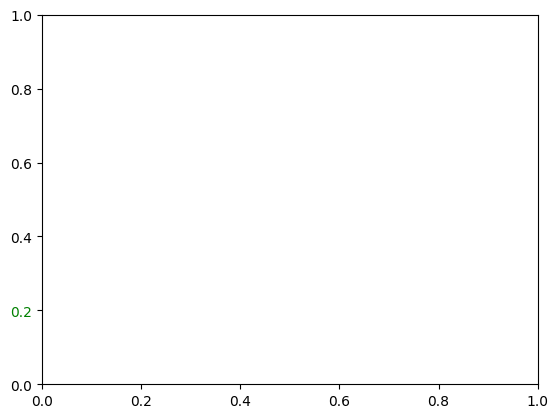

<Figure size 640x480 with 0 Axes>

In [168]:
#figure() — создаёт общую область для графиков.
#Axes — основной контейнер для отрисовки:!!!
#График» — это визуальный результат (линии, точки, столбцы и т. п.), который вы видите внутри области Axes!!! (мы рисуем график нутри axes)
#subplots() — сразу создаёт фигуру с сеткой осей, возвращая объекты для удобной настройки. Удобнее для сложных компоновок(современный и удобный подход)
#возрващает две переменные fig (Figure) — объект фигуры (подложки), на которой размещаются графики
#ax(es) (Axes или массив Axes) — объект(ы) осей, на которых строятся графики:
#Метод dir() — встроенная функция Python, которая возвращает список имён атрибутов (свойств, методов, переменных) объекта 
#или текущего локального пространства имён.
fig, _ = plt.subplots() # создадим полотно
fg = plt.figure()
print(type(fg))
print(type(fig)) # что это за тип?
print(dir(fig.axes[0])) # сколько у него разных свойств и методов.... у первой оси
#yaxis - получаем объект Y для этого подграфика
#get_major_ticks в Matplotlib возвращает список объектов‑тиков (делений) для основных (major) отметок на ОСИ (X или Y).
#label1 — это атрибут объекта Tick (например, XTick или YTick) в Matplotlib, представляющий основную текстовую метку у деления (тика) на оси.
fig.axes[0].yaxis.get_major_ticks()[1].label1.set_color('g')

In [169]:
fig.axes[0].yaxis.get_major_ticks()[3].label1
#Это не ошибка — просто точное значение позиции метки, рассчитанное библиотекой.
#Объект Text содержит:
#Первые два числа (0 и 0.60000000000001) — координаты (x, y) положения текста на графике.
#Строка '0.6' — собственно текст метки (значение деления на оси).

Text(0, 0.6000000000000001, '0.6')

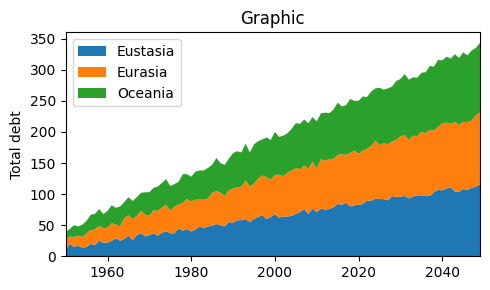

In [170]:
rng = np.arange(100)
rnd = rand.randint(10, 20, size=(3, rng.size))
yrs = 1950 + rng
fig, ax = plt.subplots(figsize=(5,3)) #создаем полотно заданным размером
ax.stackplot(yrs, rng + rnd, labels=["Eustasia", "Eurasia", "Oceania"])
#это функция из библиотеки Matplotlib, предназначенная для построения стекового (накопительного) графика.
ax.set_title("Graphic")
ax.legend(loc="best") # это метод из библиотеки Matplotlib, который добавляет легенду (пояснительную таблицу) к графику,
#построенному с использованием объектно-ориентированного интерфейса (через объект Axes).
#Параметр loc задаёт положение легенды на графике
ax.set_ylabel("Total debt")
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout() # более компактное раположение элементов графиков

plt.show()

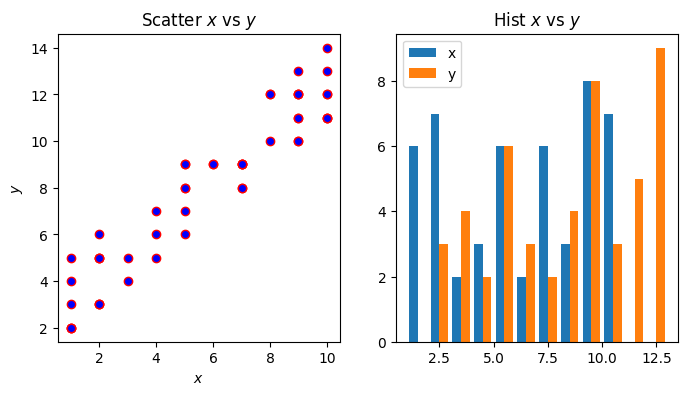

In [171]:
rand.seed(10)
#Полотно (Figure) — это весь холст
#Оси (Axes) — это область построения внутри Figure (на холсте нарисована система координат с графиком ф-ии(Axes) -  это рисунки)
x_coord = rand.randint(low=1, high=11, size=50)
y_coord = x_coord + rand.randint(1, 5, x_coord.size)
#column_stack аналогично hstack
data = np.column_stack((x_coord,y_coord)) #объединяет несколько одномерных массивов в один двумерный массив (матрицу), располагая исходные массивы в виде столбцов.
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
ax1.scatter(x = x_coord, y = y_coord, marker='o', c = 'b', edgecolors='r') #дискретное распределение
# $ - он переводит текст в математический режим
ax1.set_title("Scatter $x$ vs $y$")
ax1.set_ylabel("$y$")
ax1.set_xlabel("$x$")

ax2.hist(data, bins=np.arange(data.min(), data.max()), 
         label = ('x','y'))
ax2.legend(loc="best")
ax2.set_title("Hist $x$ vs $y$")
ax2.yaxis.tick_left()
ax2.xaxis.tick_bottom()
plt.show()

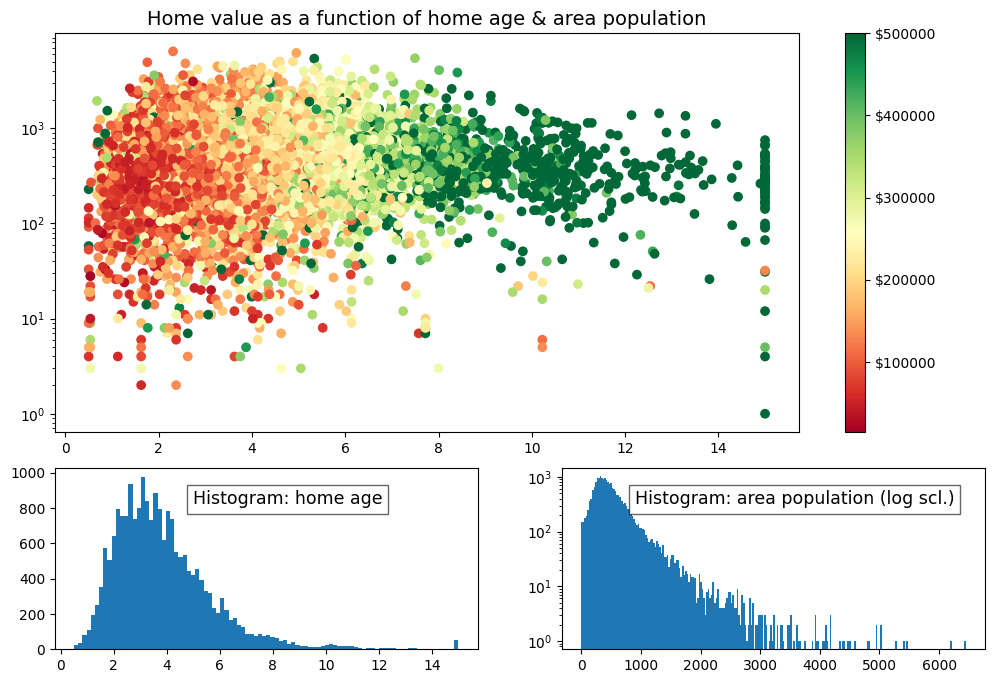

In [172]:

file_path = r'C:\Users\MateBook\Downloads\cal_housing.data'#путь и название нужного файла внутри архива
fpath = np.loadtxt(file_path, delimiter= ',') # # извлекаем нужный файл из него, читаем его как текстовый, указываем разделитель
y = fpath[:, -1] #последний столбец
pop, age = fpath[:, [4, 7]].T #взять 4 и 7 столбцы, все строки
def add_titlebox(ax, text): # создаем свою вспомогательную функцию для заданного объекта графика и текста
    ax.text(.55, .8, text, # она распологает текстовое окно
        horizontalalignment='center', # с расположением текста по центру
        transform=ax.transAxes, # "оси" для текста
        bbox=dict(facecolor='white', alpha=0.6), # очерчивание текста прямоугольником (alpha - прозрачность текста
        fontsize=12.5) # размер шрифта
    return ax


gridsize = (3, 2) # размер сетки
fig = plt.figure(figsize=(12, 8)) # создаем полотно
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # первый график будет занимать 4 клетки из сетки
ax2 = plt.subplot2grid(gridsize, (2, 0)) # а эти по одной
ax3 = plt.subplot2grid(gridsize, (2, 1)) #
ax1.set_title( # название первого графика
    'Home value as a function of home age & area population',
    fontsize=14 # размер шрифта
)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn') # строим дискретное распределение, зависимость стоимости от возраста и населенности, стоимость отображается цветом в заданной цветовой карте
plt.colorbar(sctr, ax=ax1, format='$%d') # отображаем цветовую карту со шкалой значений
ax1.set_yscale('log') # логарифмический масштаб

ax2.hist(age, bins='auto') # второй график - гисторамма возрастов
ax3.hist(pop, bins='auto', log=True) # третий график - гистограмма населенности, в логарифмическом масштабе

add_titlebox(ax2, 'Histogram: home age') # название второго графика
add_titlebox(ax3, 'Histogram: area population (log scl.)') # название третьего графика

plt.show() #



In [173]:
# matrix = [[456,2436,1234],
#            [135,135,732],
#            [1355,374,1351]]

#dig = np.diag(matrix) #извлекает элементы из главной диагонали матрицы !!!ведёт себя по‑разному в зависимости от типа входного массива. 
#если пришел одномернй массив создается матрица с элеиментами по главной диагонали, если пршел двумерный массив, создается одноммерный
#dig_transp = dig.T #!!!!Для одномерного массива транспонирование не меняет его структуру
#так как транспонирование применимо в полной мере только к матрицам размером >1×1.
#res = dig_transp.reshape((3,1)) #!!!resize работает только с массивами, имеющими единый сегмент памяти (single-segment arrays). В данном случае:
#dig_transp — это одномерный массив, который после операций мог потерять свойство непрерывности в памяти.
#.resize() изменяет массив «на месте» (in-place), но не может корректно работать с «разрозненными» участками памяти.
#reshape изменяет форму массива без изменения данных Назначение: меняет размеры матрицы (например, из 2×3 в 1×6), но не модифицирует сами элементы.
#Особенности:общее количество элементов должно оставаться неизменным;возвращает новый массив (исходный не меняется).
#dig[np.diag_indices_from(dig[::-1])] = np.arange(2, 12)
#arr2 = np.arange(dig.size).reshape(dig)

x = np.diag(np.arange(2,12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)
x, x2

(array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0, 11],
        [ 0,  3,  0,  0,  0,  0,  0,  0, 10,  0],
        [ 0,  0,  4,  0,  0,  0,  0,  9,  0,  0],
        [ 0,  0,  0,  5,  0,  0,  8,  0,  0,  0],
        [ 0,  0,  0,  0,  6,  7,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  6,  7,  0,  0,  0,  0],
        [ 0,  0,  0,  5,  0,  0,  8,  0,  0,  0],
        [ 0,  0,  4,  0,  0,  0,  0,  9,  0,  0],
        [ 0,  3,  0,  0,  0,  0,  0,  0, 10,  0],
        [ 2,  0,  0,  0,  0,  0,  0,  0,  0, 11]]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

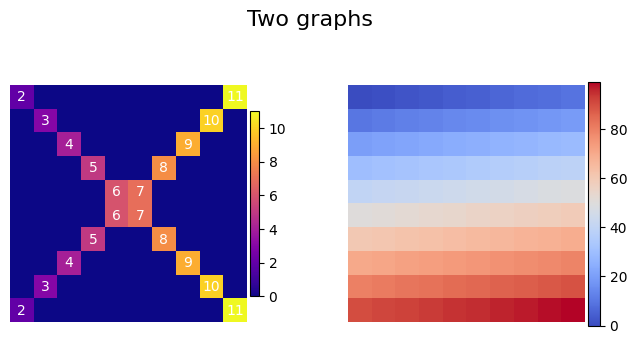

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))
im1 = ax1.matshow(x, cmap = 'plasma') #метод для отображения матрицы в виде цветной карты
ax1.axis("off") #axis (ось) Единственное число Направление в системе координат axes (оси) Множественное число Объект в matplotlib, содержащий всю область графика
im2 = ax2.matshow(x2, cmap = "coolwarm")
ax2.axis("off")
#zip - объединяет несколько итерируемых объектов (например, списки, кортежи) в один итератор кортежей,
#nonzero - возвращает индексы ненулевых элементов массива
#* - распаковка аргументов, позволяет передать элементы итерируемого объекта как отдельные позиционные аргументы функции
for i, j in zip(*x.nonzero()):
    ax1.text(j, i, x[i, j], color='white', horizontalalignment='center', verticalalignment='center') #j, i - координаты текста
plt.colorbar(im1, ax=ax1, shrink=0.6, pad = 0.01)  #shrink - сжатие цветовой шкалы, pad - отступ между графиком и цветовой шкалой
plt.colorbar(im2, ax=ax2, shrink=0.79, pad = 0.01)
plt.suptitle("Two graphs", fontsize = 16)
plt.show()

In [175]:
url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data_set = pd.read_csv(url, sep=',')
data_set.head(10) #вывод первых 10 строк датафрейма

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [176]:
data_set.info() #информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [177]:
data_set.describe() #метод в pandas для получения статистической сводки DataFrame или Series.
#std - cтандартное отклонение (standard deviation)

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [178]:
def missing_data(df):
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_table = pd.DataFrame({"Пропусков" : missing, "Пропуски в процентах" : missing_percent.round(2)})
    return missing_table[missing_table["Пропусков"] > 0] #сначала создается series со значениями true/false и потом выводятся те значения где будет значнеия true

missing_data(data_set)


,Пропусков,Пропуски в процентах
age,2,4.88


In [179]:
data_set[data_set.duplicated()] #проверка полностью дублирующих строк
dupl = data_set.duplicated(keep = False)  #ключевой параметр: помечает ВСЕ дубликаты как True (включая оригиналы)
data_set[dupl]


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [180]:
data_set[(data_set["age"] > 100) | (data_set["purchases"] < 0)], data_set[(data_set["purchases"] > 0) & (data_set["revenue"] == 0)] 
#с операторами or и and применятся побитовые операции
#Проблемы в полнте данных, важные поля, а именно есть поля Nan(незаполненные), нарушена целостность, данные противоречат друг другуг в строке 10(было совершено 4 покупки 
# при 0 доходгости), нарушена уникальность присутствуют дубликаты строчек(9 и 40), нарушена валидность(число покупок не может быть отрицательным, возраст покупателя 120 лет(сомнительно))
#итого 4 из 5 пунктов нарушены

(   user_id    age country  purchases  revenue
 5        6  120.0      FR         -1      785,
     user_id   age country  purchases  revenue
 10       11  24.0      US          4        0)

In [181]:
data_set.value_counts("country") #анализ категориальных данных

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [182]:
cross = pd.crosstab(data_set["country"], data_set["purchases"], margins = True) #таблица сопряженности
cross

purchases,-1,0,1,2,3,4,5,6,7,8,9,11,All
country,,,,,,,,,,,,,
CN,0,0,0,1,0,0,0,0,1,0,0,0,2
DE,0,0,0,0,1,1,0,2,0,0,1,1,6
FR,1,1,1,1,1,0,0,3,4,0,0,0,12
RU,0,2,0,1,1,0,2,3,3,1,0,0,13
US,0,0,0,0,2,3,2,0,0,0,1,0,8
All,1,3,1,3,5,4,4,8,8,1,2,1,41


In [183]:
group_country = data_set.groupby("country")["age"] #группировка по столбцу страна, обрщаясь внутри группировки к столбцу age
group_country.count()

country
CN     2
DE     5
FR    12
RU    13
US     7
Name: age, dtype: int64

In [184]:
mean_purchases_country = data_set.groupby(["country","age"])
mean_purchases_country.count()

user_id  purchases  revenue
country age                               
CN      20.0         1          1        1
        28.0         1          1        1
DE      18.0         1          1        1
        32.0         1          1        1
        35.0         1          1        1
        36.0         1          1        1
        52.0         1          1        1
FR      22.0         1          1        1
        25.0         1          1        1
        28.0         1          1        1
        32.0         1          1        1
        33.0         1          1        1
        39.0         1          1        1
        45.0         1          1        1
        47.0         1          1        1
        52.0         1          1        1
        55.0         1          1        1
        57.0         1          1        1
        120.0        1          1        1
RU      5.0          1          1        1
        21.0         1          1        1
        24.0         4          4        4
        26.0         1          1        1
        31.0         2          2        2
        34.0         1          1        1
        46.0         1          1        1
        47.0         1          1        1
        54.0         1          1        1
US      23.0         1          1        1
        24.0         1          1        1
        35.0         1          1        1
        39.0         1          1        1
        42.0         1          1        1
        43.0         1          1        1
        51.0         1          1        1

In [200]:
data_set["age_gr"] = pd.cut(data_set["age"], bins = [0,10,20,30,40,50,100], labels=['0-10', '11-20','21-30','31-40','41-50','50+']) 
data_set.groupby("age_gr", observed=True).count() #группировка, по возрасту


,user_id,age,country,purchases,revenue
age_gr,,,,,
0-10,1,1,1,1,1
11-20,2,2,2,2,2
21-30,12,12,12,12,12
31-40,11,11,11,11,11
41-50,6,6,6,6,6
50+,6,6,6,6,6


In [234]:
average_age_country = data_set.groupby('country')['age'].mean()#средний возраст по стране
revenue_country = data_set.groupby('country')['revenue'].sum()
average_purchases_sum = data_set.groupby('country')['purchases'].sum()#количесвто покупок в стране
average_age_country,average_purchases_sum, revenue_country 
#исходя из проделанной работы, можно сделать вывод, что во Франции находятся наиболее возрастная группа людей по среднему возрасту среди населения, в CN - наименее
#также самая численная группа людей - это люди возрастом 21-30
#страна с самым высоким доходом Россия, Китай с самым низким

(country
 CN    24.000000
 DE    34.600000
 FR    46.250000
 RU    30.076923
 US    36.714286
 Name: age, dtype: float64,
 country
 CN     9
 DE    39
 FR    51
 RU    62
 US    37
 Name: purchases, dtype: int64,
 country
 CN     2108
 DE     8673
 FR     8111
 RU    10271
 US     4459
 Name: revenue, dtype: int64)

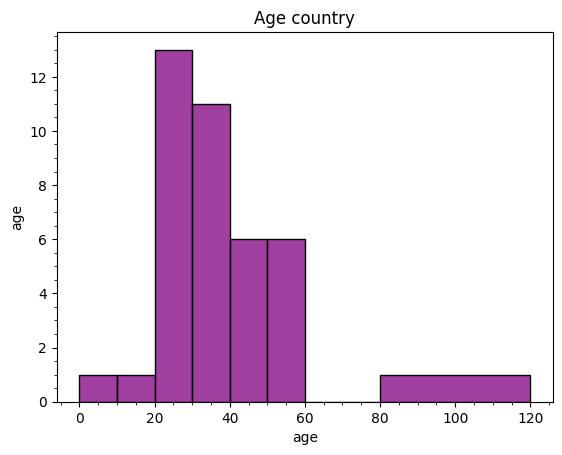

In [383]:
sns.histplot(data_set['age'], bins=[0,10,20,30,40,50,60,70,80,120], color='purple')
plt.ylabel("age")
plt.title('Age country')
plt.savefig(r'C:\Users\MateBook\test\MLtask\homeworks\HW02\figures\age_country.png')
plt.minorticks_on()

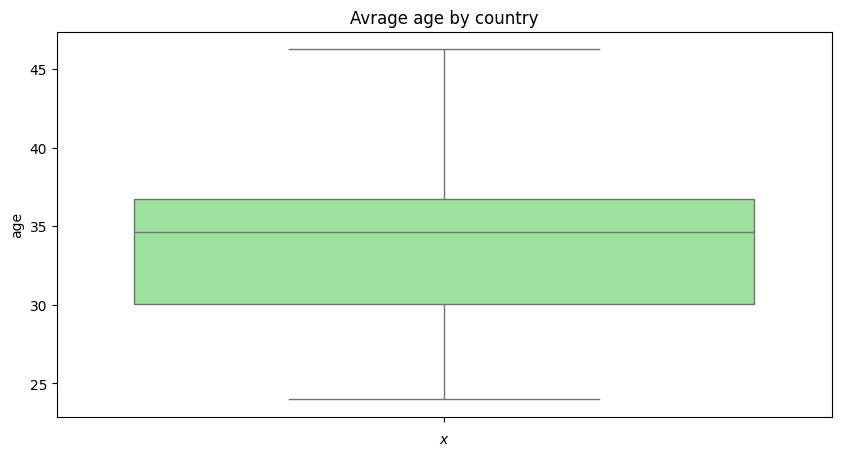

In [378]:
plt.figure(figsize=(10,5))
sns.boxplot(data_set.groupby('country')['age'].mean(), color='lightgreen')
plt.xlabel("$x$")
plt.title("Avrage age by country")
plt.savefig(r'C:\Users\MateBook\test\MLtask\homeworks\HW02\figures\average_age_country.png')
plt.show()



NameError: name 'saf' is not defined

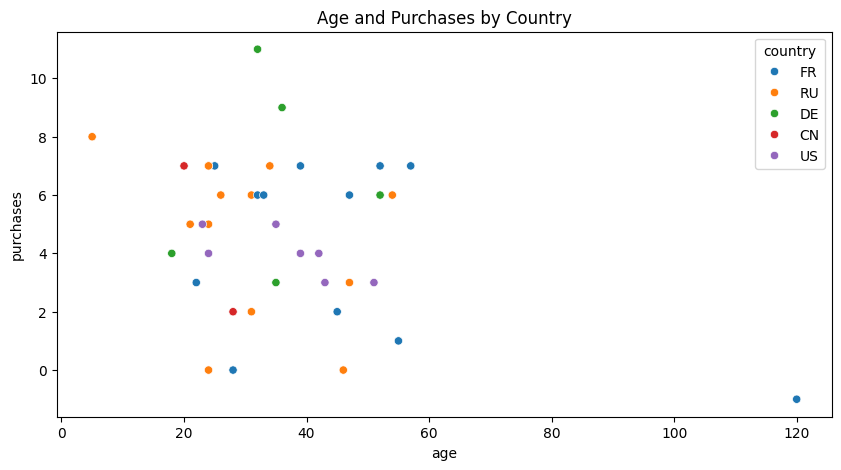

In [385]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data_set['age'], y = data_set['purchases'], hue=data_set['country'])
plt.title("Age and Purchases by Country")
plt.savefig(r'C:\Users\MateBook\test\MLtask\homeworks\HW02\figures\age_purchases_country.png')
saf